In [1]:
%matplotlib inline

# Transformación de variables

Transformación de variables aplicada a los datasets de `olivetti_faces` y `digits`.

In [2]:
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn.datasets import fetch_olivetti_faces, load_digits
from sklearn.decomposition import PCA
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Binarizer, StandardScaler


rng = RandomState(0)
n_components = 6

In [4]:
def plot_gallery(title, images, image_shape, n_col=n_components, n_row=1):
    plt.figure(figsize=(2. * n_components, 2.26))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(1, n_components, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

In [6]:
datasets = {'olivetti_faces': (fetch_olivetti_faces(shuffle=True,
                                                    random_state=rng),
                               (64, 64)),
            'digits': (load_digits(), (8, 8))}

In [7]:
# Añade la RBM como una opción más al diccionario de transformadores
transformers = {'pca': Pipeline([('scaler', StandardScaler()),
                                 ('pca', PCA(n_components=64))]),
                'rbm': ...}

In [8]:
def transform(dataset, transformer):
    bunch, shape = datasets[dataset]
    estimator = transformers[transformer]
    plot_gallery(dataset, bunch.data[:n_components], shape)
    estimator.fit(bunch.data)
    try:
        components_ = estimator.components_
    except:
        components_ = estimator.named_steps[transformer].components_
    plot_gallery(transformer, components_[:n_components], shape)
    plt.show()

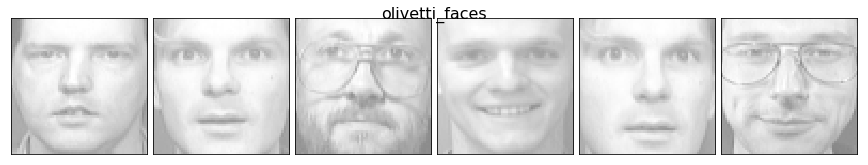

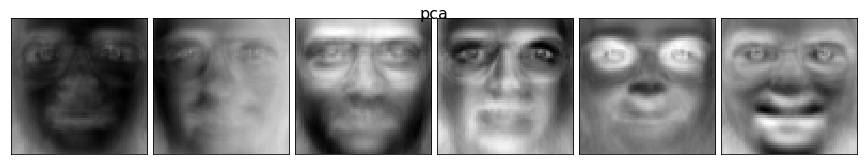

In [9]:
transform('olivetti_faces', 'pca')

In [ ]:
transform('olivetti_faces', 'rbm')

In [ ]:
# Ahora crea un pipeline de clasificación y compara una regresión logística
# sin transformación previa de variables, con PCA y con RBM

In [13]:
transformers.items()

dict_items([('pca', Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=64, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])), ('rbm', Ellipsis)])